In [83]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import pandas_datareader.data as web
import datetime
from datetime import date
large = 22; med = 16; small = 12

params = {
    'axes.titlesize':large,
    'legend.fontsize':med,
    'figure.figsize':(16,9),
    'axes.labelsize':med,
    'axes.titlesize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
}
#We can tell Matplotlib to automatically make room for elements in the figures that we create
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')


In [2]:
my_purpose = """
探索不同贷款类型的金额占比分布
随时间变化，贷款总量的变化
贷款利率的分布是怎么样的
好的贷款和坏账的定义，好的贷款和坏账分布如何
借款者的工作年限如何，坏账与工作年限之间存在着什么样的关系
借款者年收入如何，与坏账之间的关系
风险等级的分布如何，哪个风险等级最容易出现坏账，也就是出现逾期
借款者房子状态的分布，哪种类型房子的用户容易出现逾期
借款者的借款目的是怎么分布的，哪种目的可能出现坏账
"""
LC_intro = 'https://zhuanlan.zhihu.com/p/137328490'

# 一、读取数据

In [3]:
loan = pd.read_csv("E:\MyMySql\lending-club-loan-data\loan.csv",nrows=50000,encoding="utf-8")
loan.head()

<>:1: DeprecationWarning: invalid escape sequence \M


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# 二、 理解字段

In [4]:
print(len(loan))
for i in loan.columns.values:
    rate = loan[i].isnull().sum()/len(loan[i])
    if rate >= 0.400000:
        print(loan[i])
        del loan[i]

50000
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: id, Length: 50000, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: member_id, Length: 50000, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: url, Length: 50000, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: desc, Length: 50000, dtype: float64
0         NaN
1        71.0
2         NaN
3         NaN
4         NaN
         ... 
49995    58.0
49996    26.0
49997     NaN
49998    10.0
49999     NaN
Name: mths_since_last_delinq, Length: 50000, dtype: float64
0        45.0
1        75.0
2         NaN
3         NaN
4         NaN
         ...

In [5]:
#del loan['id'],采用inplace=True之后，原数组名（如2和3情况所示）对应的内存值直接改变
loan.sample(10)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
30854,24000,24000,24000,60 months,14.47,564.31,C,C2,NaN,< 1 year,...,0.0,0,0,19678,5531,8000,11678,N,Cash,N
29715,35000,35000,35000,36 months,8.19,1099.85,A,A4,Pharmacist,5 years,...,83.3,0,0,389477,70653,30800,79226,N,Cash,N
44338,30000,30000,30000,36 months,7.56,934.02,A,A3,Investment Adviser,10+ years,...,8.3,0,0,511031,159512,93100,144721,N,Cash,N
39783,12800,12800,12800,36 months,16.14,450.90,C,C4,Care Coordinator,4 years,...,0.0,0,0,81134,65722,11300,67834,N,Cash,N
505,15000,15000,15000,36 months,7.02,463.30,A,A2,owner,10+ years,...,28.6,0,0,134414,43924,92400,29014,N,Cash,N
15365,3000,3000,3000,36 months,11.31,98.66,B,B3,Mail Processor,10+ years,...,50.0,0,0,96676,84376,2200,81376,N,Cash,N
8491,20000,20000,20000,36 months,15.02,693.51,C,C3,Professor,2 years,...,100.0,0,0,63717,54515,23100,40317,N,DirectPay,N
26773,25000,25000,25000,36 months,8.19,785.61,A,A4,IT- Technical Analyst I,4 years,...,0.0,0,0,81399,44979,42900,27999,N,Cash,N
31602,10000,10000,9725,36 months,11.31,328.86,B,B3,NaN,2 years,...,0.0,0,0,39204,17006,9600,28304,N,Cash,N
38919,25000,25000,25000,60 months,11.80,553.59,B,B4,NaN,< 1 year,...,20.0,0,0,157487,34155,52700,26868,N,Cash,N


In [6]:
print(len(loan.columns.values))
for i in range(len(loan.columns.values)):
    print(loan.columns.values[i])

102
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_rece

# 数据预处理

In [7]:
#查看是否有重复值
loan.duplicated().sum()

0

In [8]:
#数据类型的转换和提取
loan.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'

In [9]:
#日期类型的转换
date = pd.to_datetime(loan['issue_d'])
loan['year'] = date.dt.year#提取出年份
loan['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
49995    2018
49996    2018
49997    2018
49998    2018
49999    2018
Name: year, Length: 50000, dtype: int64

# 数据探索

# 

# 

# 

# 用户画像分析

# 1.借款者工作年限分布

In [10]:
#提取出数字年份
uniques = pd.Series(loan['emp_length'].dropna())#计算Index中唯一值的
uniques=uniques.value_counts()
index = uniques.index
values = uniques.values
print(index,values)

Index(['10+ years', '< 1 year', '2 years', '3 years', '1 year', '5 years',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object') [14956  6357  4290  3946  3643  2986  2844  2112  1646  1630  1060]


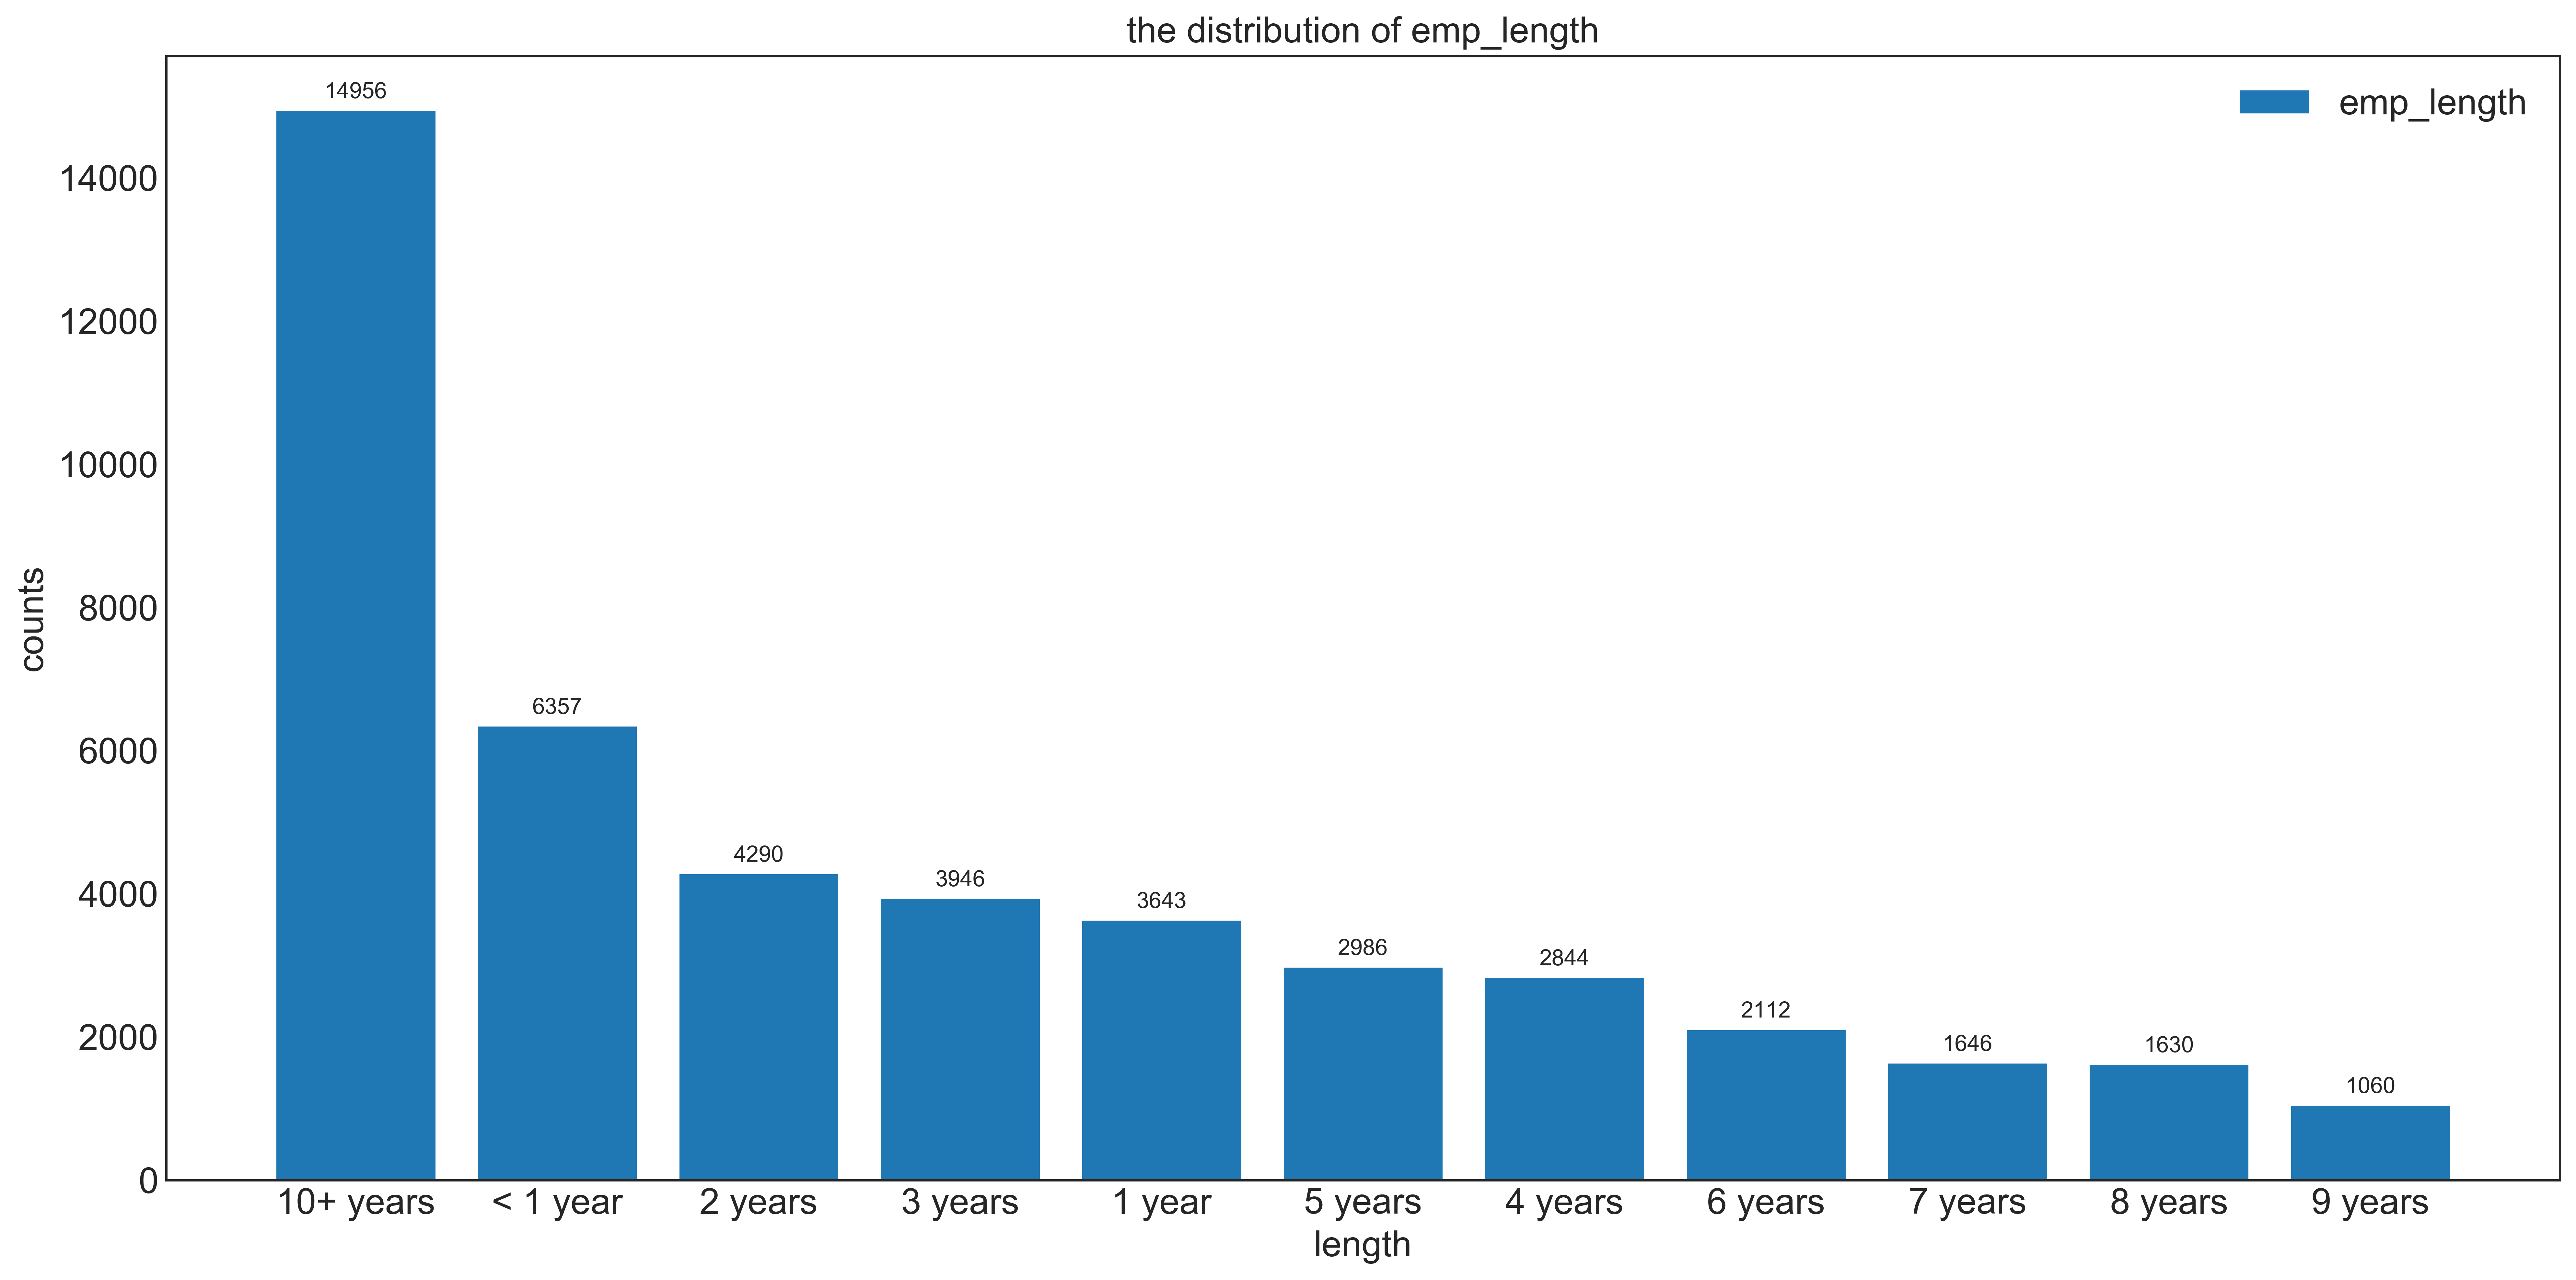

In [11]:
x = np.arange(len(index))#the label locations
width = 0.35#the width of the bars

fig,ax = plt.subplots(figsize=(16,8),dpi=500)
rects1 = ax.bar(index,values,label='emp_length')

#Add some text for labels,title and custom x-axis tick labels,etc.
ax.set_xlabel('length')
ax.set_ylabel('counts')
ax.set_title('the distribution of emp_length')
ax.set_xticks(x)
ax.set_xticklabels(index)#设立X刻度标签
ax.legend()

def autolabel(rects):
    """
    Attach a text label above each bar in *rects*,
    displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width()/2,height),
                    xytext=(0,3),#3 points vertical offset
                    textcoords = 'offset points',
                    ha='center',va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

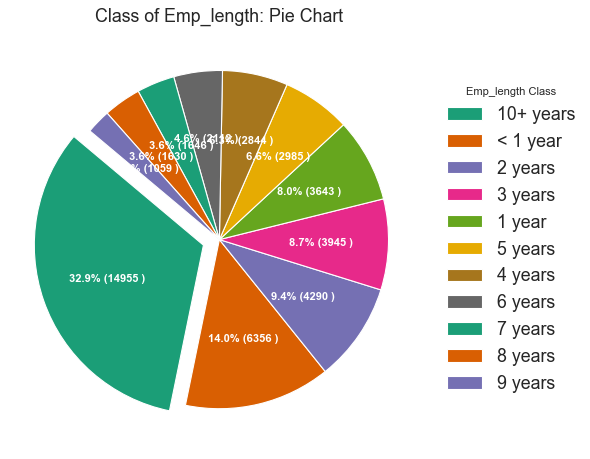

In [12]:
#Draw Plot
fig,ax = plt.subplots(figsize=(12,7),subplot_kw=dict(aspect="equal"),dpi=80)

index = uniques.index
values = uniques.values
explode = [0.1,0,0,0,0,0,0,0,0,0,0]

def func(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(values,
                                  autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

#Decoration
ax.legend(wedges, index, title="Emp_length Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Emp_length: Pie Chart")
plt.show()

In [13]:
analysis = """
信息：借款者的工作年限在十年以上的占总体的32.9%，只有工作年限在一年以下的占比14.0%，而其他的工作年限占比均在3%-8%之间。
这说明Lending Club对借款者的工作年限有严格把握，不达到一定年限的很难申请到；
"""

# 2.借款者年收入分布

In [14]:
#连续数据的离散化
print(loan['annual_inc'].dtypes)
des = loan['annual_inc'].describe()
format = lambda x:'%.2f'%x#取两位小数
des.apply(format)

float64


count      50000.00
mean       83058.96
std       100718.45
min            0.00
25%        48000.00
50%        70000.00
75%       100000.00
max      9000000.00
Name: annual_inc, dtype: object

In [15]:
"""
法二
"""
data=loan['annual_inc'].copy().dropna()
bins = [0,20000,40000,60000,80000,100000,200000,300000]
cates = pd.Series(pd.cut(data,bins))
cates = cates.value_counts()
cates = cates.sort_index()
cates

(0, 20000]           1121
(20000, 40000]       7637
(40000, 60000]      12150
(60000, 80000]      10430
(80000, 100000]      7066
(100000, 200000]     9951
(200000, 300000]     1124
Name: annual_inc, dtype: int64

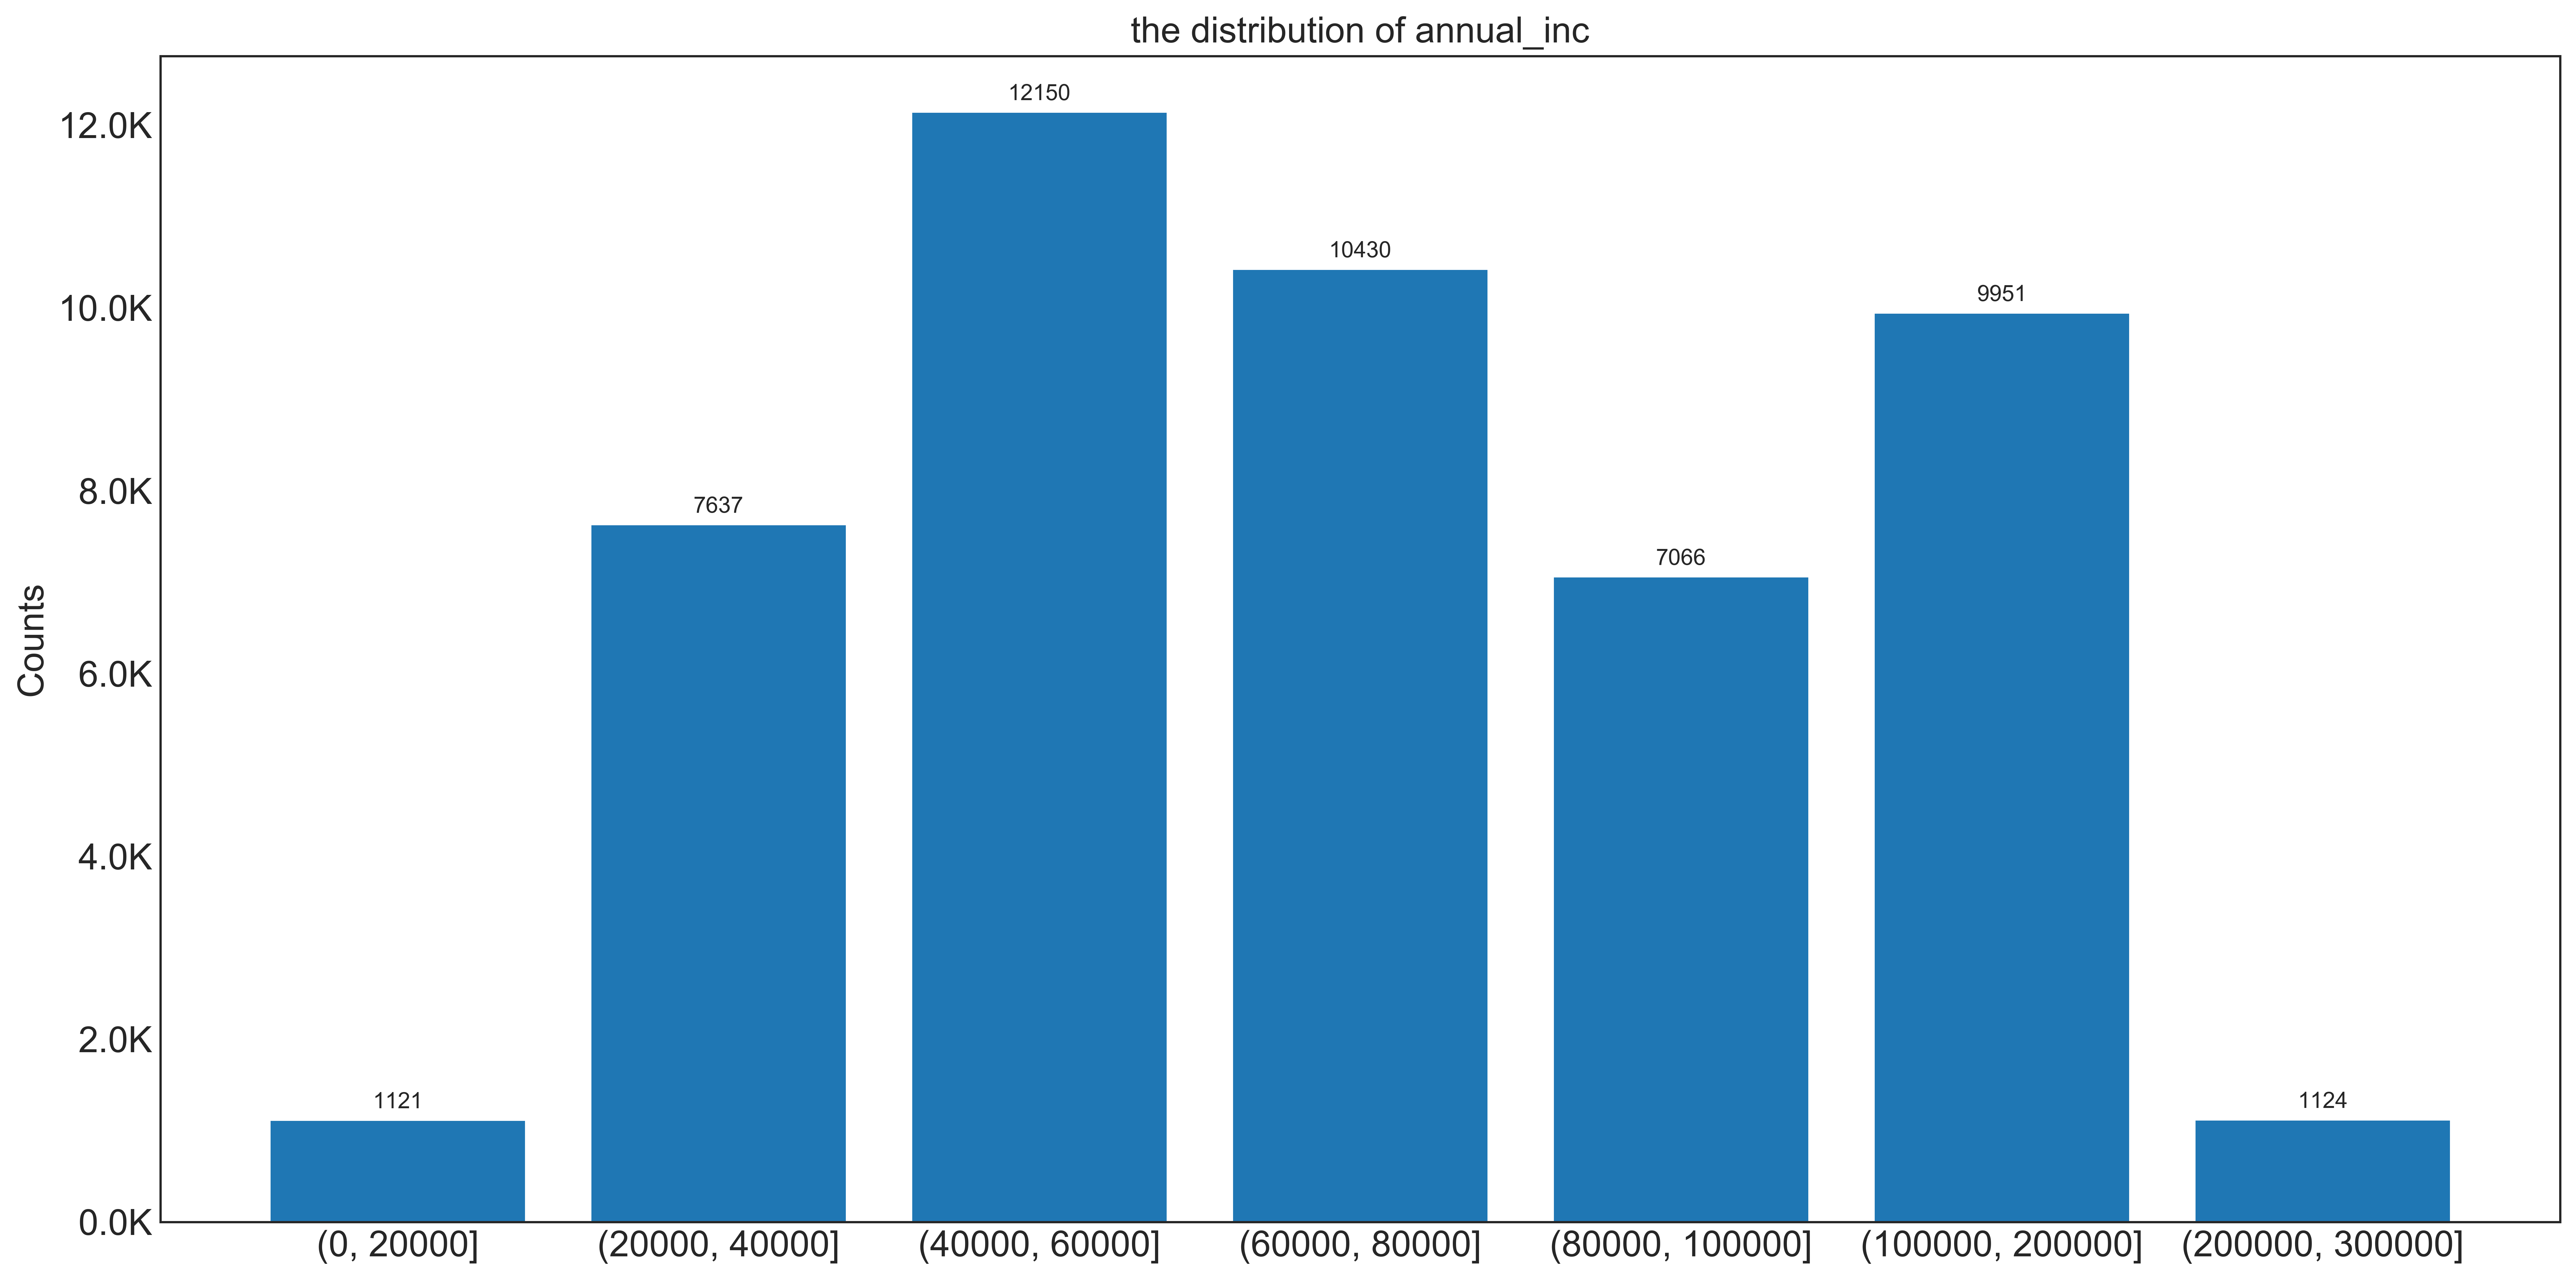

In [16]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
width=0.35
indexs = cates.index
values = cates.values

def ten_thousand(x,pos):
    'The two args are the value and tick position'
    return '%1.1fK'%(x/1000)

formatter = FuncFormatter(ten_thousand)

fig,ax = plt.subplots(figsize=(16,8),dpi=500)
ax.yaxis.set_major_formatter(formatter)
rects1 = ax.bar(x,values,label='Cates')

#Add some text for labels,title and custom x-axis tick labels,etc.
ax.set_ylabel('Counts')
ax.set_title("the distribution of annual_inc")
ax.set_xticks(x)
ax.set_xticklabels(indexs)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height=rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),
                    xytext=(0,3),#3 points vertical offset
                    textcoords="offset points",
                    ha='center',va='bottom')
autolabel(rects1)

fig.tight_layout()

plt.show()

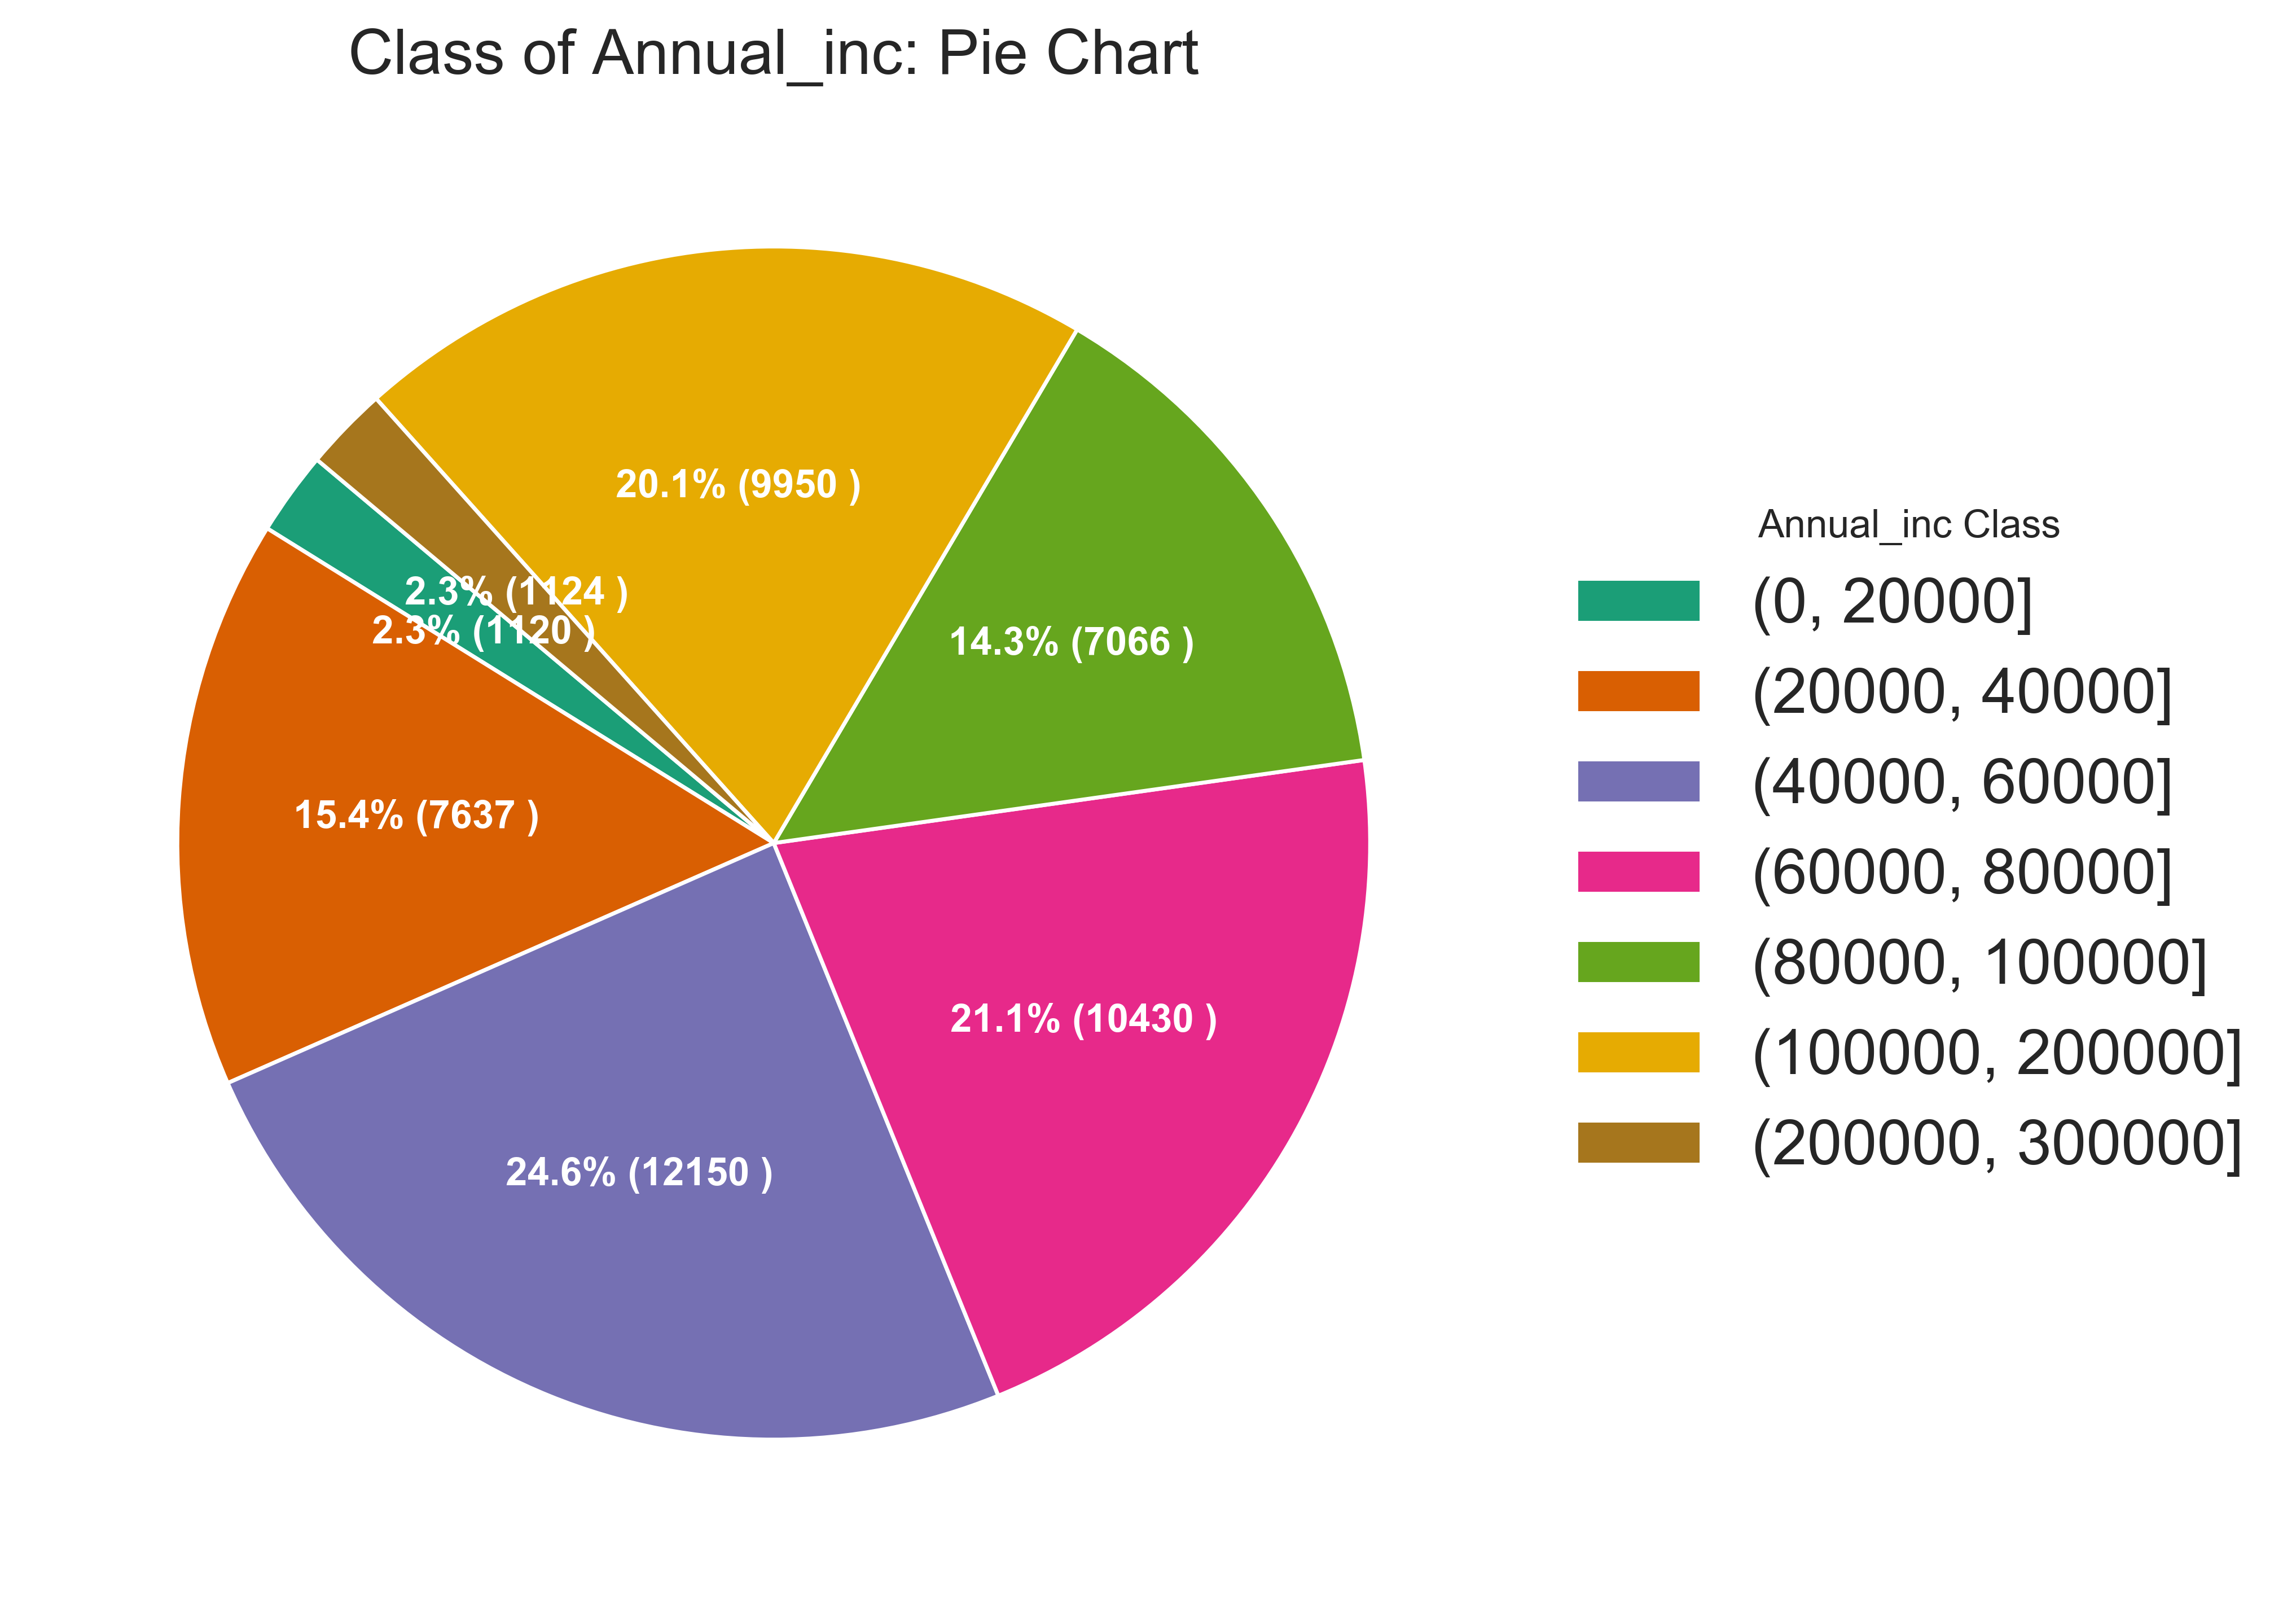

In [17]:
#Draw Plot
fig,ax = plt.subplots(figsize=(12,7),subplot_kw=dict(aspect="equal"),dpi=500)

indexs = cates.index
values = cates.values
explode = [0,0,0,0,0,0,0,]

def func(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(values,
                                  autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

#Decoration
ax.legend(wedges, indexs, title="Annual_inc Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Annual_inc: Pie Chart")
plt.show()

In [18]:
analysis = """
信息:借款人年收入在20000以下或200000以上的占比极少，只占4.6%；借款人在(20000,200000]的占比为95.4%，其中(40000,80000]的占(20000,200000]的绝大部分。
"""

In [19]:
"""
法一
"""
def anaul_income(income):
    if income <= 20000:
        return '0-2w'
    elif income <= 40000:
        return '2-4w'
    elif income <= 60000:
        return '4-6w'
    elif income <= 80000:
        return '6-8w'
    elif income <= 100000:
        return '8-10w'
    elif income <= 200000:
        return '10-20w'
    else:
        return '中产以上家庭'

loan['annual_inc_category'] = loan['annual_inc'].apply(anaul_income)

loan['annual_inc_category']

0          4-6w
1         8-10w
2          4-6w
3         8-10w
4          4-6w
          ...  
49995      6-8w
49996      6-8w
49997      2-4w
49998    10-20w
49999      6-8w
Name: annual_inc_category, Length: 50000, dtype: object

# 住房属性分布

50000


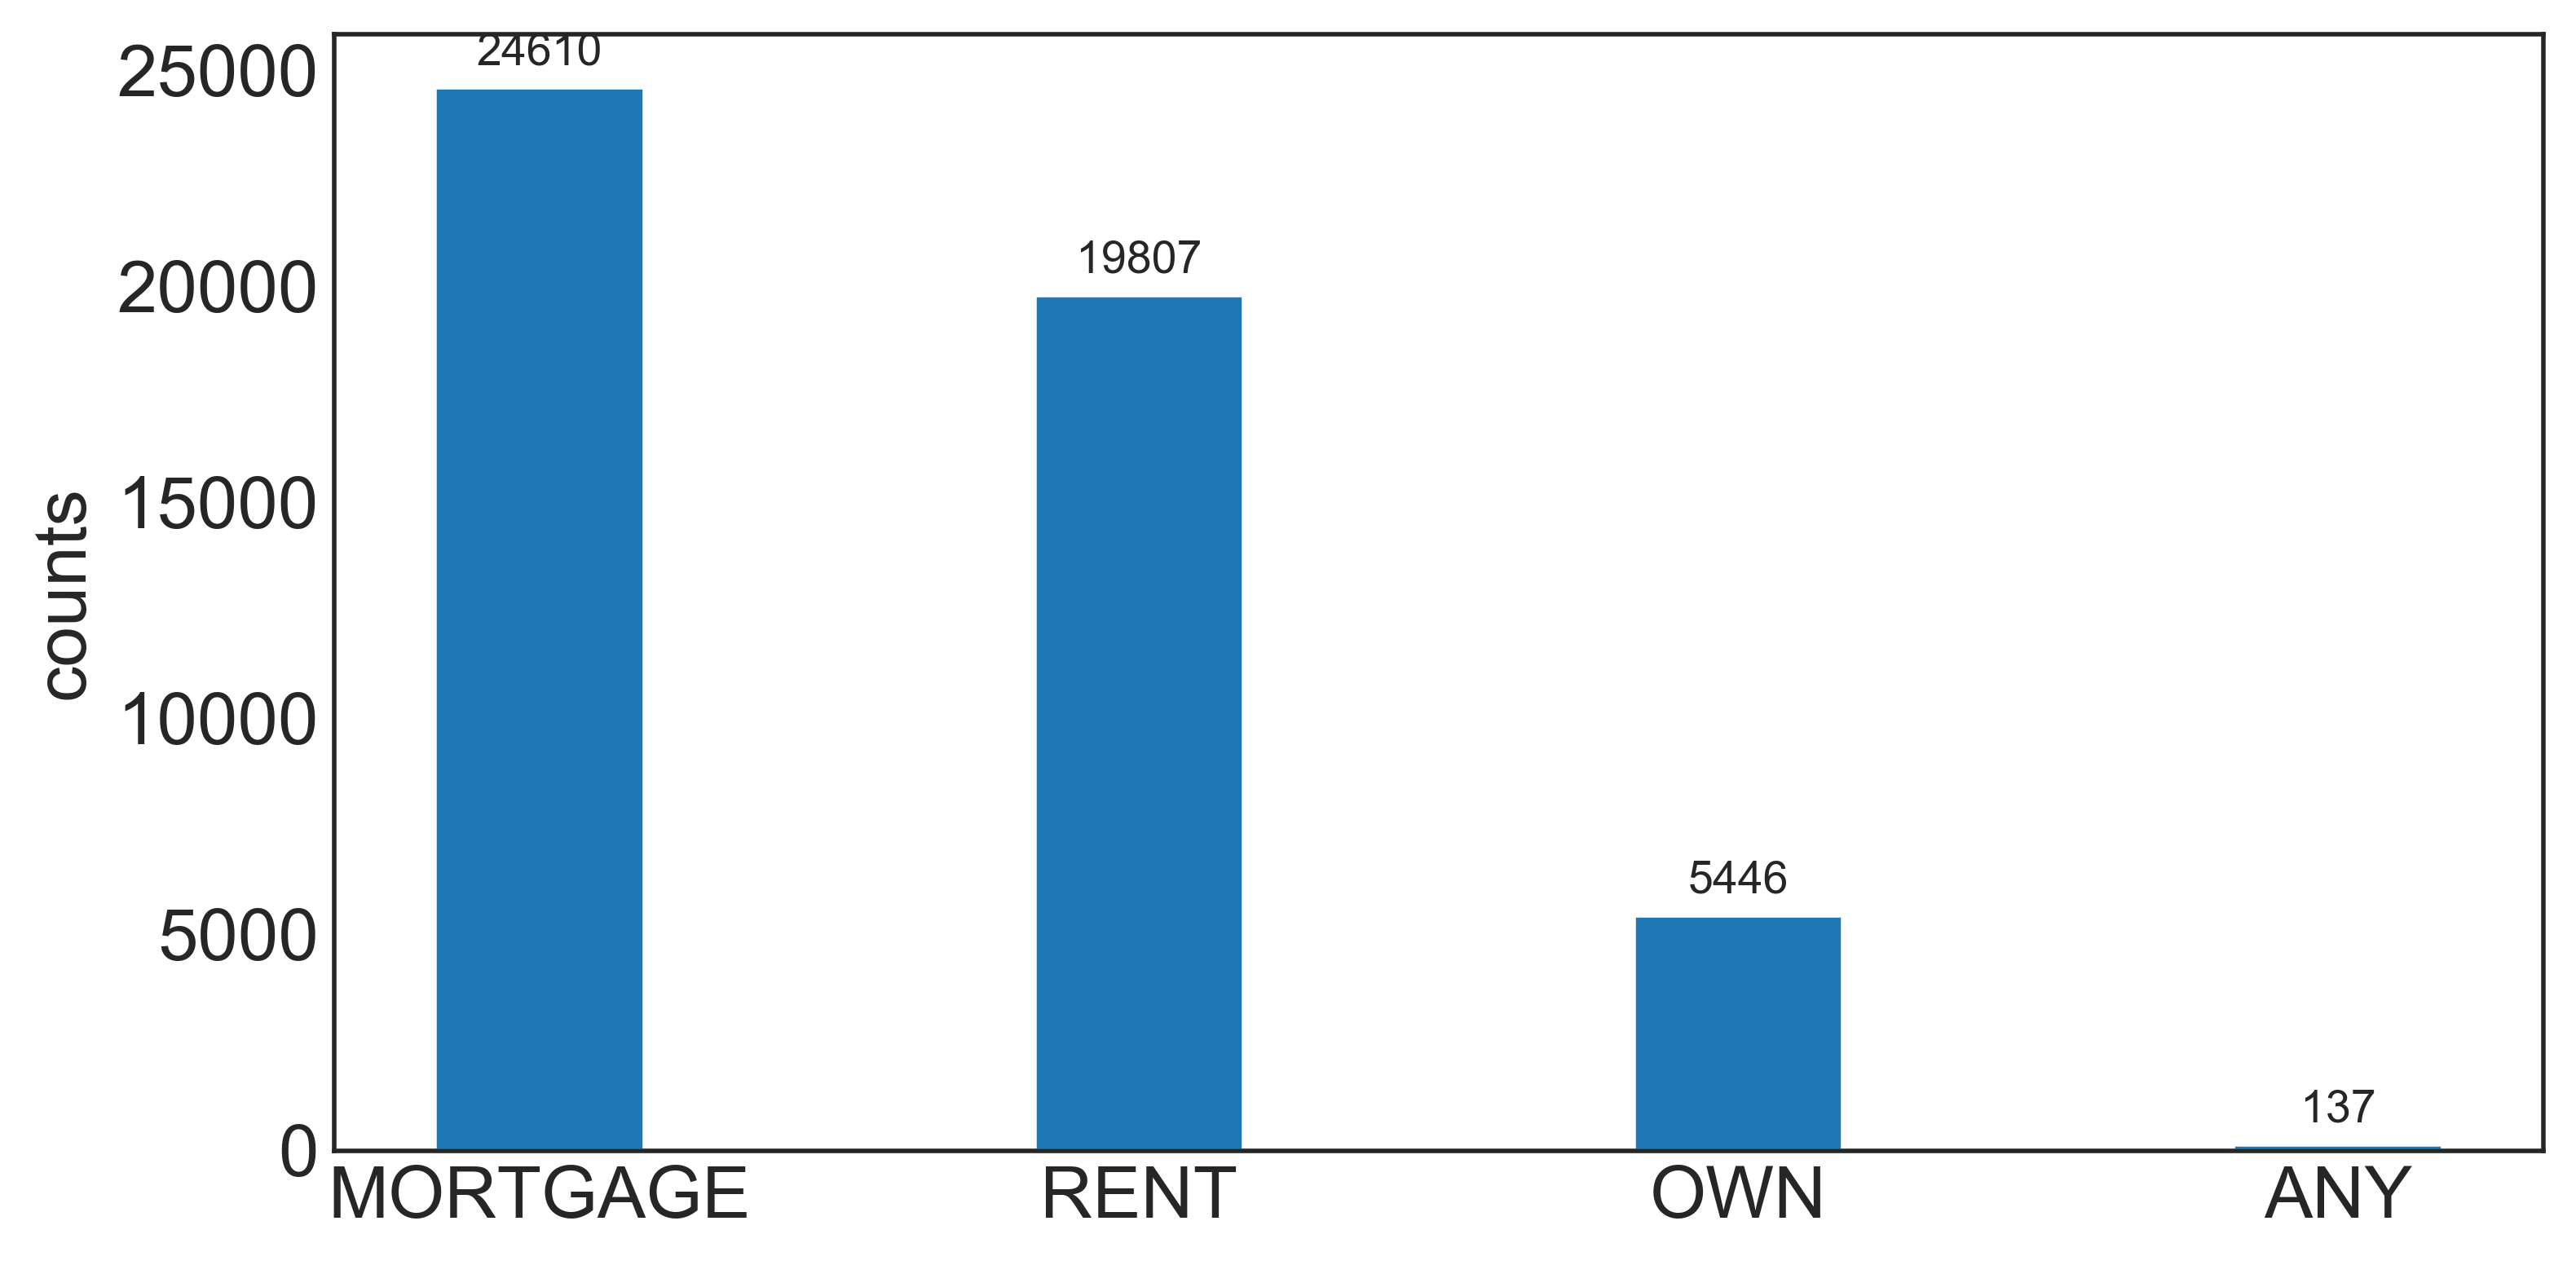

In [21]:
home_ownership = loan['home_ownership'].dropna()
print(len(home_ownership))
home_counts = home_ownership.value_counts()
c_indexs = home_counts.index
c_values = home_counts.values

x = np.arange(len(c_indexs))#the label locations
width=0.35#the width of the bars

fig,ax = plt.subplots(figsize=(8,4),dpi=400)
rects1 = ax.bar(x,c_values,width,label='the counts of home_ownership')

#Add some text for labels,title and custom x-axis tick labels,etc.
ax.set_ylabel('counts')
ax.set_xticks(x)
ax.set_xticklabels(c_indexs)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),#specifying the (x,y) point to annotate
                    xytext=(0,3),#3 points vertical offset,to plate the text at.
                    textcoords='offset points',#offset(in points) from the xy value
                    ha='center',va='bottom'
                   )
        
autolabel(rects1)

fig.tight_layout()

plt.show()

In [22]:
信息 = """
借款者按揭贷款买房的占49.22%，租房的占39.164%；这说明绝大数借款者皆不对房屋拥有所有权。
"""

# 用户职业分布

In [23]:
emp_title = loan['emp_title'].dropna()
str_lower = lambda s:s.lower()#为啥使用小写还不能去重
title = emp_title.apply(str_lower)
t_counts = title.value_counts()
t_counts = t_counts.sort_values(axis=0,ascending=True)[-30:]

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,FuncFormatter
from collections import namedtuple

group_data = list(t_counts.values)
group_names = list(t_counts.index)
print(group_data,'\n',group_names)

[98, 104, 107, 111, 113, 114, 115, 116, 116, 118, 137, 139, 140, 142, 153, 164, 170, 187, 234, 250, 269, 273, 277, 289, 290, 349, 433, 469, 827, 947] 
 ['foreman', 'accountant', 'manager ', 'supervisor ', 'administrative assistant', 'account manager', 'president', 'store manager', 'technician', 'server', 'mechanic', 'engineer', 'vice president', 'police officer', 'nurse', 'sales manager', 'operations manager', 'director', 'owner', 'office manager', 'project manager', 'sales', 'general manager', 'rn', 'truck driver', 'supervisor', 'driver', 'registered nurse', 'manager', 'teacher']


[Text(0, 0.5, 'occupation'),
 Text(0.5, 0, 'Counts'),
 Text(0.5, 1.0, 'the counts of occupation')]

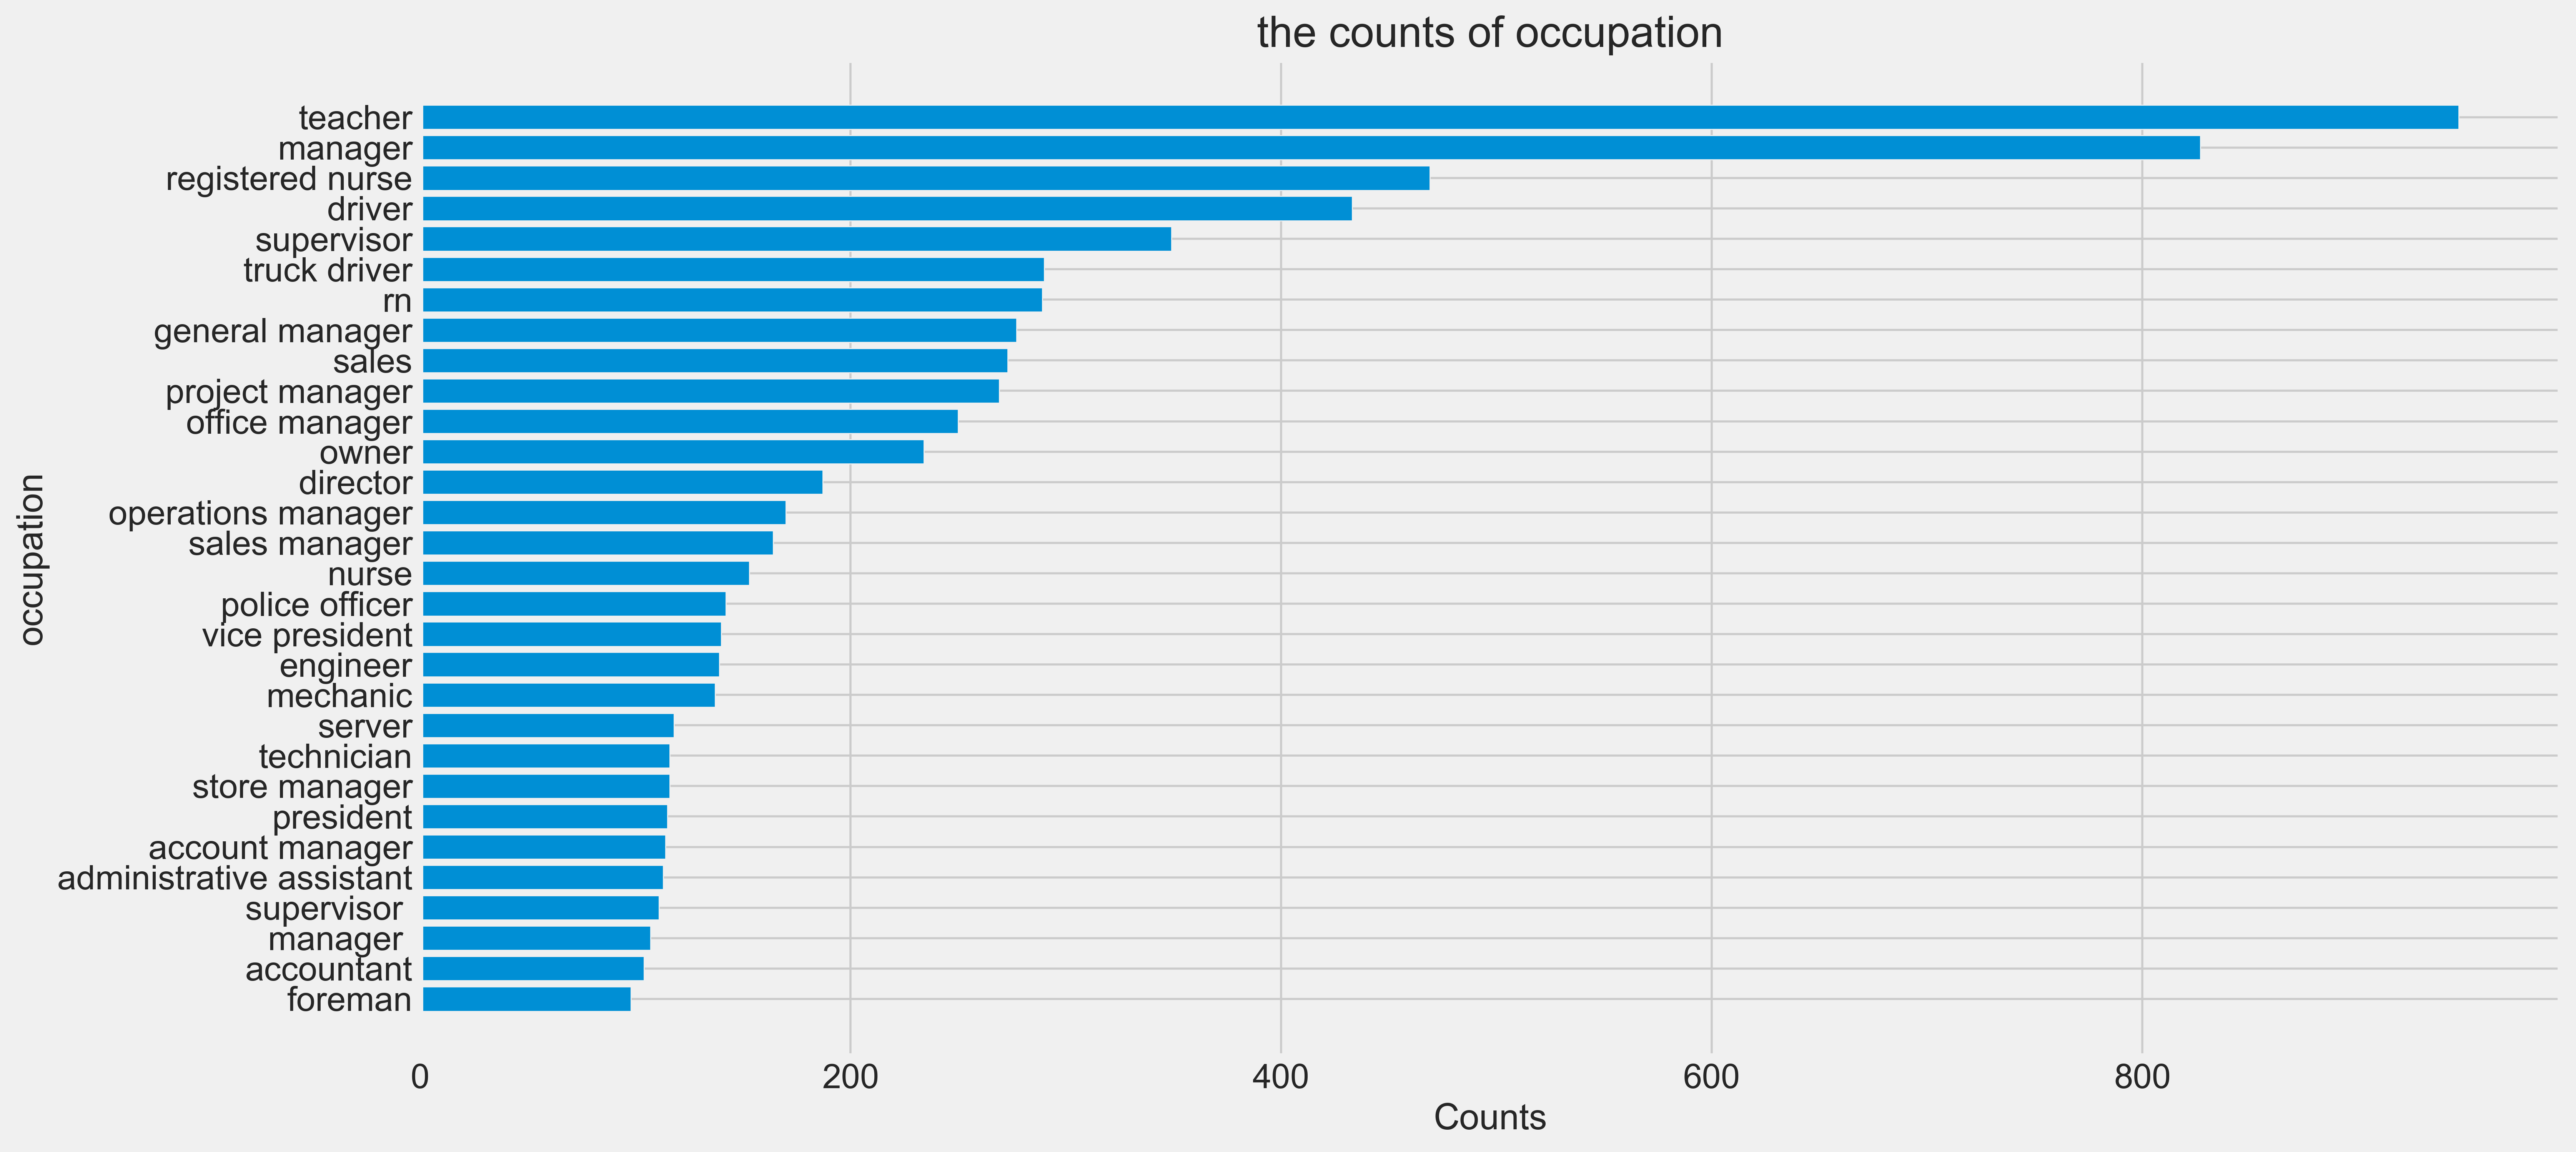

In [27]:
plt.style.use('fivethirtyeight')#Controlling the style
fig,ax=plt.subplots(figsize=(16,8),dpi=400)#Create an axe
ax.barh(group_names,group_data)
ax.set(xlabel='Counts',ylabel='occupation',
      title='the counts of occupation')

In [ ]:
信息 = """
老师、工程师、注册护士、司机(包括卡车司机)，占绝大多数。
"""

In [ ]:
用户画像分析 = """
用户工作年限：借款者的工作年限在十年以上的占总体的32.9%，
只有工作年限在一年以下的占比14.0%，而其他的工作年限占比均在3%-8%之间。

用户年收入：借款人年收入在20000以下或200000以上的占比极少，
只占4.6%；借款人在(20000,200000]的占比为95.4%，
其中(40000,80000]的占(20000,200000]的绝大部分。

用户住房性质：借款者按揭贷款买房的占49.22%，租房的占39.164%；
这说明绝大数借款者皆不对房屋拥有所有权。

用户工作职业：老师、工程师、注册护士、司机(包括卡车司机)，占绝大多数。

"""

# 平台贷款业务分析

# 1.贷款总量明细

In [44]:
date = pd.to_datetime(loan['issue_d'])
year = date.dt.year#.dt.accessor has an accessor to succinctly return datetime like properties 
month = date.dt.month#for the values of the Series.
day = date.dt.day
hour = date.dt.hour
second = date.dt.second
"""
本次数据分析报告一个可惜的点是不能做时间序列分析，
因为本次只有2018年的数据，且只有这一年的12月和11月份数据，12月和11月份的数据量严重失衡，且均在12月和11月的第一天。
"""
date.values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', ...,
       '2018-11-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

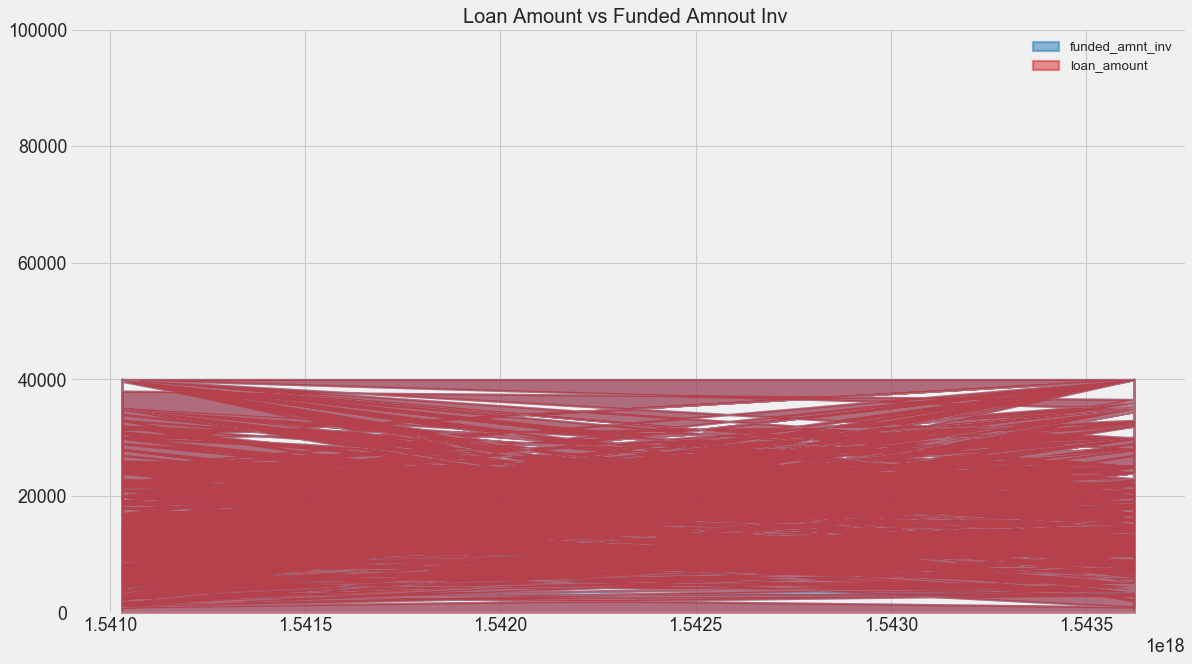

In [69]:
date = date
loan_amount = loan['loan_amnt'].values
funded_amnt_inv = loan['funded_amnt_inv'].values

#prepare Data
x = date.tolist()#Return the array as an a.ndim-levels deep nested list of Python scalars
y1 = loan_amount.tolist()
y2 = funded_amnt_inv.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive'] 
columns = ['loan_amount','funded_amnt_inv']

#Draw plot
fig,ax = plt.subplots(1,1,figsize=(16,9),dpi=80)
ax.fill_between(x,y1=y1,y2=0,label=columns[1],alpha=0.5,color=mycolors[1],linewidth=2)
ax.fill_between(x,y1=y2,y2=0,label=columns[0],alpha=0.5,color=mycolors[0],linewidth=2)

#Decoration
ax.set_title('Loan Amount vs Funded Amnout Inv ',fontsize=18)
ax.set(ylim=[0,100000])
ax.legend(loc='best',fontsize=12)
#plt.xticks(x[::50], fontsize=10, horizontalalignment='center')#plt.ticks has two attributes:locs,labels 
#plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
#plt.xlim(-10, x[-1])


#Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()


In [ ]:
信息 = """
借款者贷款总量与投资者投资总量的分布重合。这说明投资者的资金得到充分利用。
"""

# 2.不同贷款利率的贷款总量

In [92]:
loan_amount = loan['loan_amnt']
funded_amnt_inv = loan['funded_amnt_inv']
int_rate = loan['int_rate']
print(int_rate)
print(int_rate.dtype)

0        13.56
1        18.94
2        17.97
3        18.94
4        16.14
         ...  
49995    17.97
49996    11.31
49997    11.31
49998     6.46
49999    17.97
Name: int_rate, Length: 50000, dtype: float64
float64


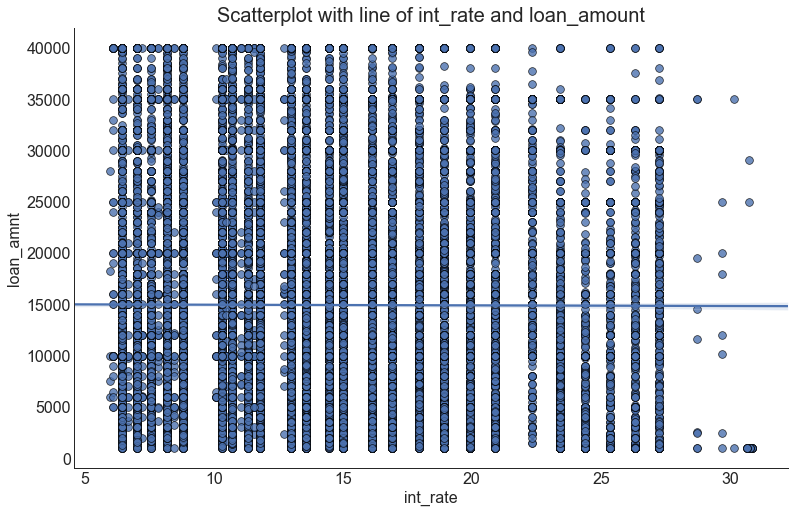

In [94]:
#Scatter plot with linear regression line of best fit
data = pd.DataFrame(int_rate,loan_amount)
sns.set_style("white")
gridobj = sns.lmplot(x="int_rate",y="loan_amnt",data=loan,height=7,aspect=1.6,robust=True,palette='tabl0',
                    scatter_kws=dict(s=60,linewidths=.7,edgecolors='black'))

#Decoration
plt.title("Scatterplot with line of int_rate and loan_amount",fontsize=20)
plt.show()

In [ ]:
信息 = """
贷款利率和贷款金额无相关性。
"""

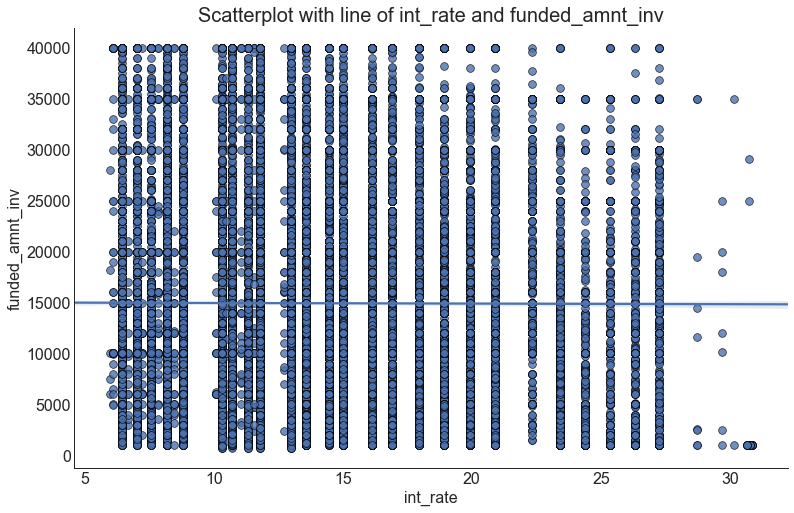

In [95]:
#Scatter plot with linear regression line of best fit
data = pd.DataFrame(int_rate,loan_amount)
sns.set_style("white")
gridobj = sns.lmplot(x="int_rate",y="funded_amnt_inv",data=loan,height=7,aspect=1.6,robust=True,palette='tabl0',
                    scatter_kws=dict(s=60,linewidths=.7,edgecolors='black'))

#Decoration
plt.title("Scatterplot with line of int_rate and funded_amnt_inv",fontsize=20)
plt.show()

In [ ]:
信息 = """
投资者的投资额与贷款利率也并无相关性
"""

# 3.不同贷款等级的贷款总量分布

In [241]:
多重索引 = "先把他们合并到一个df中,然后做一个具有层次化索引的df"

grade = loan['grade'].values
subgrade = loan['sub_grade'].values
loan_amount = loan['loan_amnt'].values

"""From dict of ndarrays"""
d = {
    'grade':grade,
    'subgrade':subgrade,
    'loan_amount':loan_amount
}
loan_new = pd.DataFrame(d)
#创建一个group对象
grouped = loan_new.groupby([loan_new['grade'],loan_new['subgrade']])
sum = grouped.sum()#层次化索引的df对象
sum = sum.unstack().T
sum

grade                          A           B           C           D  \
            subgrade                                                   
loan_amount A1        48393150.0         NaN         NaN         NaN   
            A2        30850600.0         NaN         NaN         NaN   
            A3        30187900.0         NaN         NaN         NaN   
            A4        70900800.0         NaN         NaN         NaN   
            A5        45712925.0         NaN         NaN         NaN   
            B1               NaN  44893100.0         NaN         NaN   
            B2               NaN  47699925.0         NaN         NaN   
            B3               NaN  31369250.0         NaN         NaN   
            B4               NaN  64222725.0         NaN         NaN   
            B5               NaN  47132700.0         NaN         NaN   
            C1               NaN         NaN  44305425.0         NaN   
            C2               NaN         NaN  38458825.0         NaN   
            C3               NaN         NaN  41045500.0         NaN   
            C4               NaN         NaN  35752000.0         NaN   
            C5               NaN         NaN  33157475.0         NaN   
            D1               NaN         NaN         NaN  27145700.0   
            D2               NaN         NaN         NaN  24785950.0   
            D3               NaN         NaN         NaN  22980175.0   
            D4               NaN         NaN         NaN  17745150.0   
            D5               NaN         NaN         NaN  10653350.0   
            E1               NaN         NaN         NaN         NaN   
            E2               NaN         NaN         NaN         NaN   
            E3               NaN         NaN         NaN         NaN   
            E4               NaN         NaN         NaN         NaN   
            E5               NaN         NaN         NaN         NaN   
            F1               NaN         NaN         NaN         NaN   
            F2               NaN         NaN         NaN         NaN   
            F3               NaN         NaN         NaN         NaN   
            F4               NaN         NaN         NaN         NaN   
            F5               NaN         NaN         NaN         NaN   
            G1               NaN         NaN         NaN         NaN   
            G2               NaN         NaN         NaN         NaN   

grade                          E         F       G  
            subgrade                                
loan_amount A1               NaN       NaN     NaN  
            A2               NaN       NaN     NaN  
            A3               NaN       NaN     NaN  
            A4               NaN       NaN     NaN  
            A5               NaN       NaN     NaN  
            B1               NaN       NaN     NaN  
            B2               NaN       NaN     NaN  
            B3               NaN       NaN     NaN  
            B4               NaN       NaN     NaN  
            B5               NaN       NaN     NaN  
            C1               NaN       NaN     NaN  
            C2               NaN       NaN     NaN  
            C3               NaN       NaN     NaN  
            C4               NaN       NaN     NaN  
            C5               NaN       NaN     NaN  
            D1               NaN       NaN     NaN  
            D2               NaN       NaN     NaN  
            D3               NaN       NaN     NaN  
            D4               NaN       NaN     NaN  
            D5               NaN       NaN     NaN  
            E1        10107625.0       NaN     NaN  
            E2         3895825.0       NaN     NaN  
            E3         5744600.0       NaN     NaN  
            E4         5192850.0       NaN     NaN  
            E5         8404225.0       NaN     NaN  
            F1               NaN  122700.0     NaN  
            F2               NaN   88650.0     NaN  
            F3

<Figure size 3200x12800 with 0 Axes>

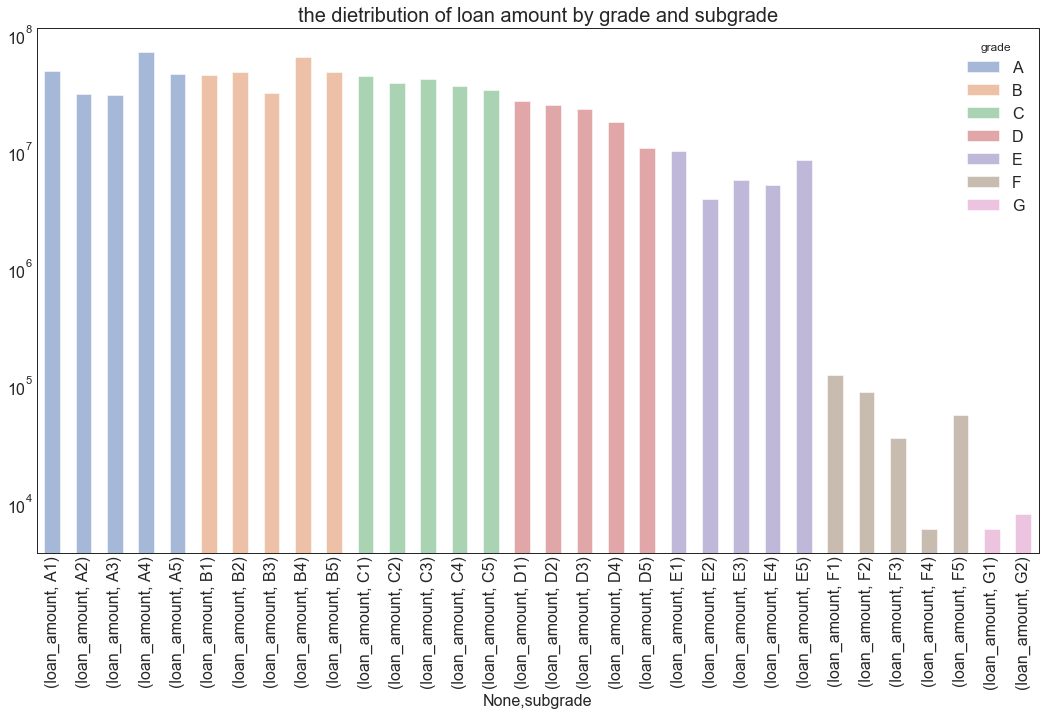

In [242]:
#fig,ax = plt.subplots((2,1)dpi=400)，创建多个画图区域时调用它
plt.figure(figsize=(4,16),dpi=800)
sum.plot(kind='bar',stacked=True,legend=True,logy=True,alpha=0.5)
plt.title("the dietribution of loan amount by grade and subgrade",fontsize=20)
plt.show()

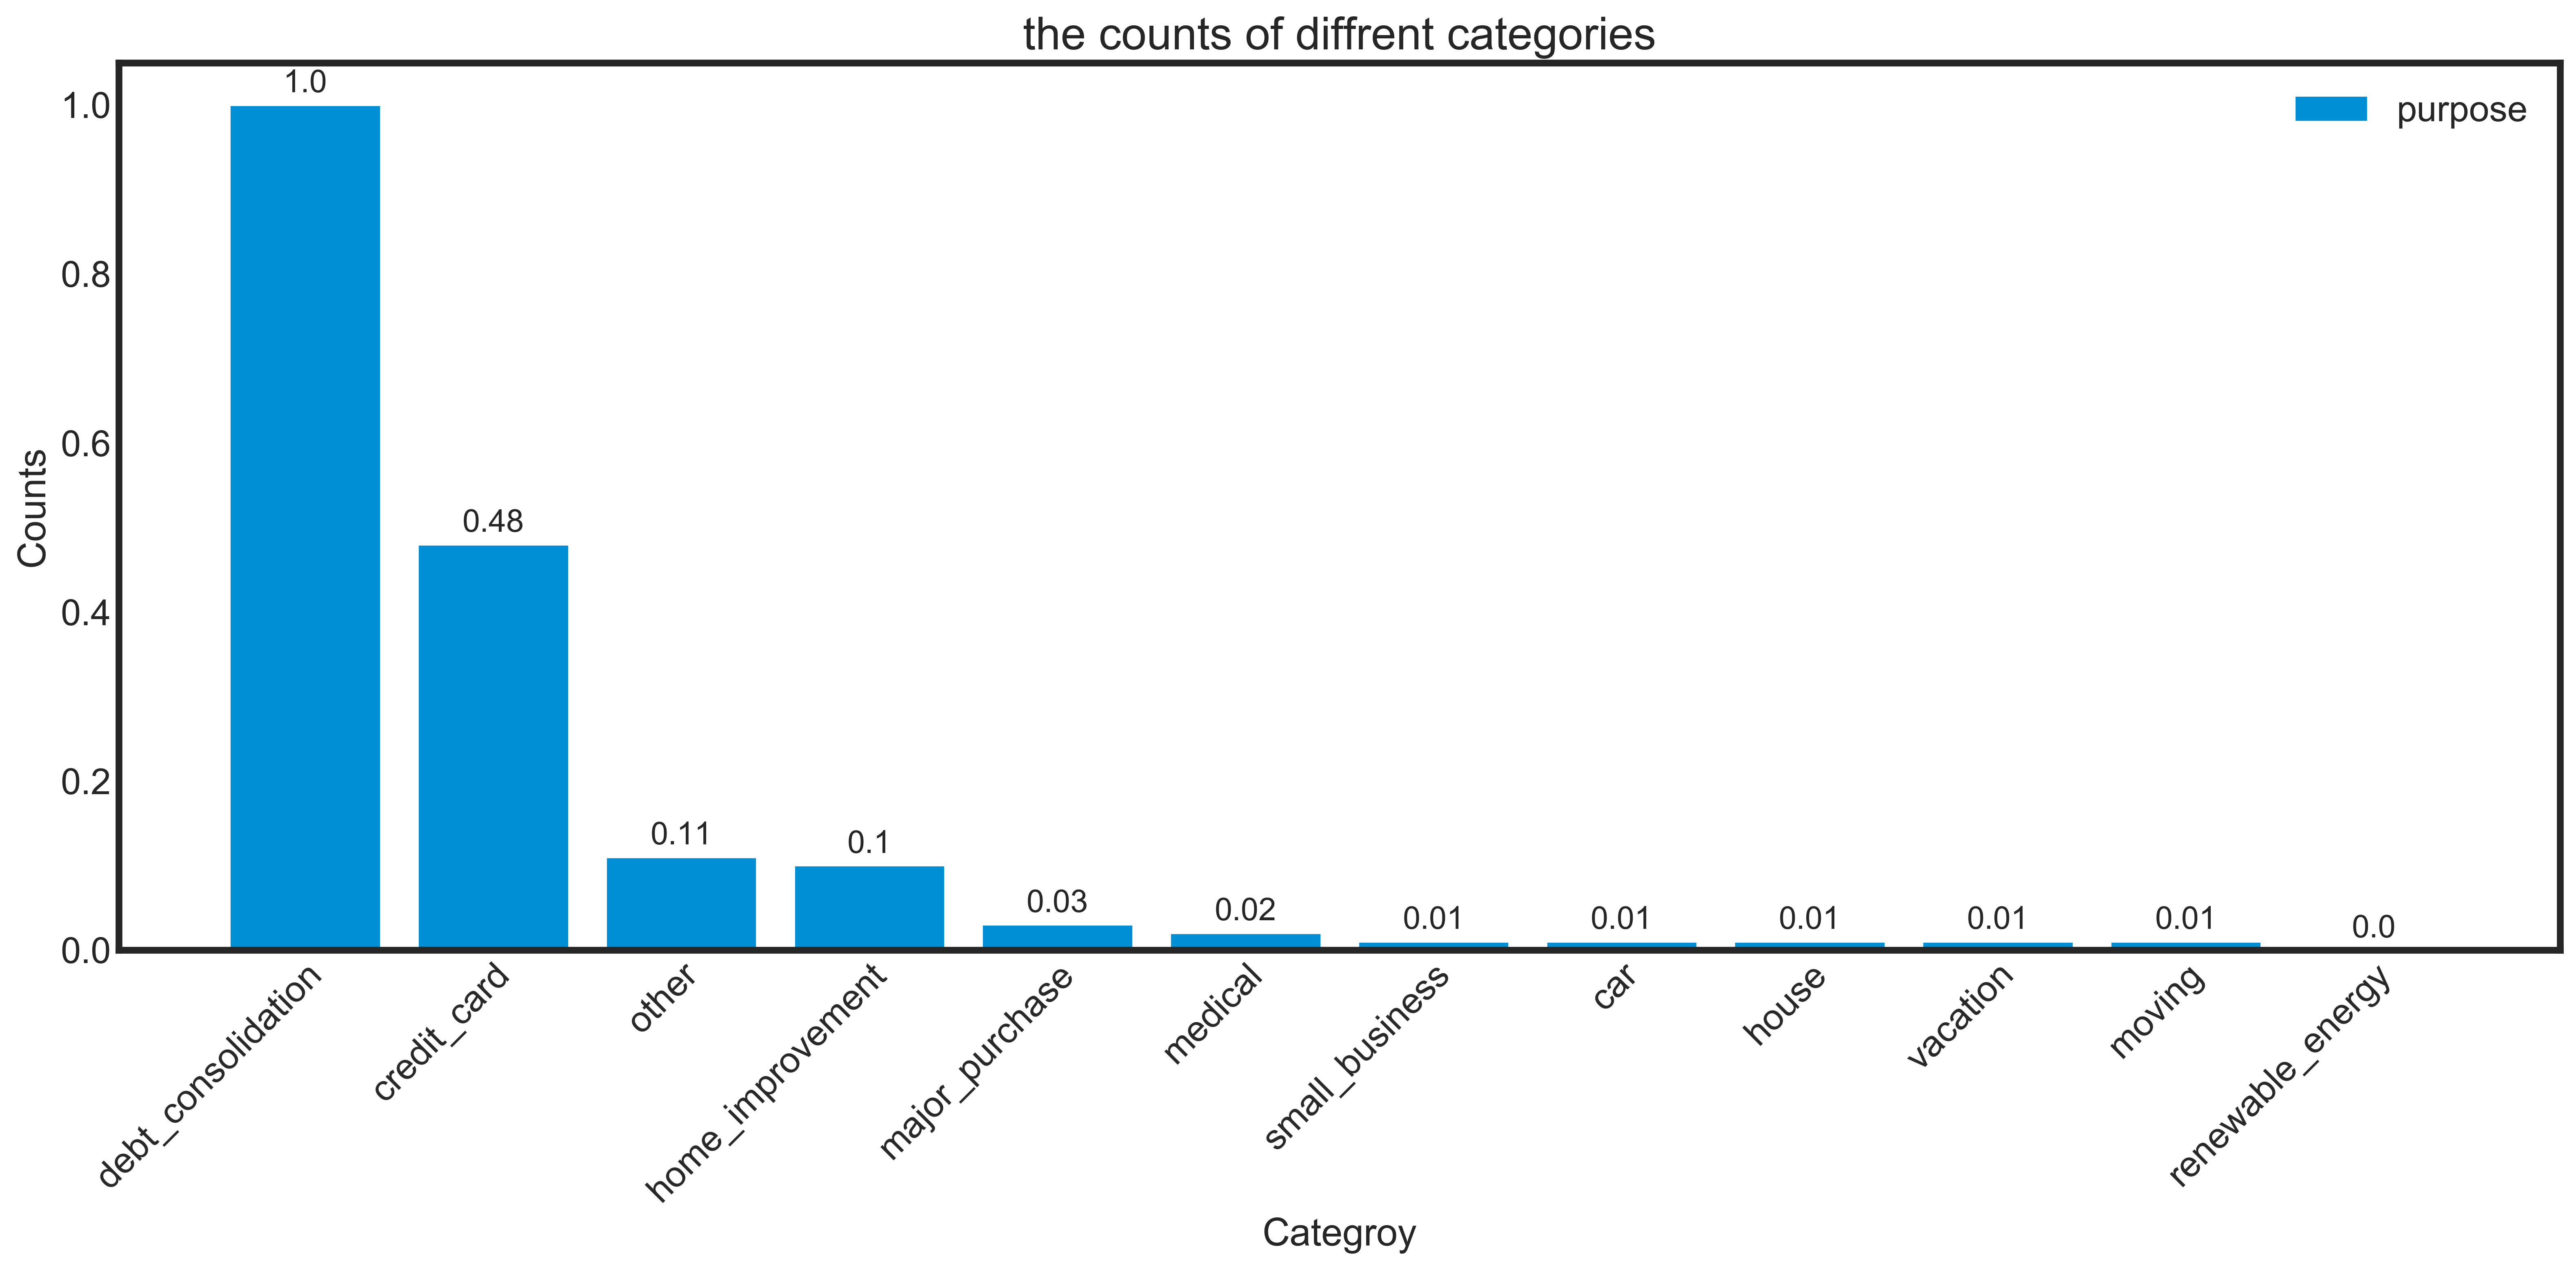

In [80]:
from pandas.api.types import CategoricalDtype
purpose = loan['purpose']
#转换为类型数据类型
purpose=purpose.astype(dtype='category')
#查看分类型数据的分类
purpose.cat.categories
#类似于数值型的描述
purpose.describe()
#按计数大小进行排序
purpose.sort_values(inplace=True)#抹掉原数组
purpose.describe()

#计数
count = purpose.value_counts()
#数据归一化
std_1 = lambda x:round((x-count.min())/(count.max()-count.min()),2)
count = count.apply(std_1)
count

x = np.arange(len(count.index))#the label loactions
width = 0.35 #the width of the bars


fig,ax=plt.subplots(figsize=(16,8),dpi=400)
rects = ax.bar(x,count.values,label="purpose")

#Add some text for labels, title and custom x-axis tick labels,etc.
ax.set_ylabel("Counts")
ax.set_xlabel("Categroy")
ax.set_xticks(x)
ax.set_xticklabels(count.index)
ax.legend()
ax.set_title("the counts of diffrent categories",fontsize=20)


#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(),rotation=45,ha="right",
        rotation_mode="anchor")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() +rect.get_width()/2,height ),
                   xytext=(0,3),#3 points vertical offset
                   textcoords="offset points",
                    ha="center",va="bottom"
                   )
autolabel(rects)

fig.tight_layout()

plt.show()

ValueError: Invalid RGBA argument: 'noe'

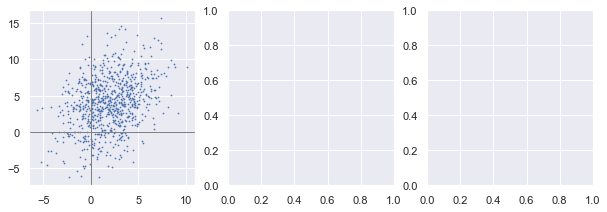

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
'''
椭圆：matplotlib.Patches.Ellipse((圆心), 横轴, 竖轴, angele=.., color=.., fill=..)
    --> return: Ellipse(xy=(0.2, 0.8), width=0.2, height=0.3, angle=20)
'''

"""
The plotting function itself
"""
def confidence_ellipse(x,y,ax,n_std=3.0,facecolor='noe',**kwargs):
    """
    Create a plot of the convariance confidence ellipse of *x* and *y*.
    
    parameters
    -------------
    x,y:array-like,shape(n,)
        Input data.
    
    ax:matplotlib.axes.Axes
        The axes object to draw the ellipse into.
        
    n_std:float
        The number of standard deviations to determine the ellipse radiuses.
    
    Returns
    ---------
    matplotlib.patches.Ellipse
    
    other parameters
    ------------------
    kwargs:'`matplotlib.pathces.Patch' properties
    """
    if x.size != y.size:
        return ValueError("x and y must be the same size")
    cov = np.cov(x,y)
    pearson = cov[0,1]/np.sqrt(cov[0,0]*cov[1,1])
    
    #Using a special case to obtain the eigenvalues of this
    #two-dimensional dataset.
    ell_radius_x = np.sqrt(1+pearson)
    ell_radius_y = np.sqrt(1-pearson)
    ellipse = Ellipse((0,0),
                     width=ell_radius_x*2,
                     height=ell_radius_y*2,
                     facecolor=facecolor,
                     **kwargs)
    
    #Calculating the stdandard deviation of x from 
    #the squareroot of the variance and multiplying
    #with the given number of standard deviations.
    scale_x = np.sqrt(cov[0,0])*n_std
    mean_x = np.mean(x)
    #calculating the stdandard deviation of y...
    scale_y = bp.sqrt(cov[1,1])*n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D()\
        .rotate_deg(45)\
        .scale(scale_x,scale_y)\
        .translate(mean_x,mean_y)
    
    #The Axes.set_transform() function in axes module of matplotlib library
    #is used to set the artist transform.
    ellipse.set_transform(transf+ax.transData)
    return ax.add_patch(ellipse)

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]



np.random.seed(0)

PARAMETERS = {
    'Positive correlation':np.array([[0.85,0.35],
                                    [0.15,-0.65]]),
    'Negative correlation':np.array([[0.9,-0.4],
                                     [0.1,-0.6]]),
    'Weak correlation':np.array([[1,0],
                                 [0,1]])
}

mu = 2,4
scale = 3,5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)
    
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    
    confidence_ellipse(x, y, ax, edgecolor='red')
    
    
    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)
    
plt.show()